In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.constants import pi, c

def finesse(R_1, R_2):
    num = pi*(R_1*R_2)**0.25
    den = 1 - (R_1*R_2)**0.5
    return num/den

def quality_factor(omega, delta_omega):
    return omega/delta_omega

def t_cav(n, L_cav, R):
    return (n*L_cav) / (c*(1-R))

In [29]:
finesse(0.999, 0.999)

3140.0214643674417

In [31]:
omega = 2*pi*c / (589E-9)

tau = t_cav(n=1, L_cav=1E-2, R=0.999)

delta_omega = tau**(-1)

quality_factor(omega, delta_omega)

106675472.10831206

In [3]:
t_cav(n=1, L_cav=1E-3, R=0.99)

3.335640951981517e-10

# EMpy Tester

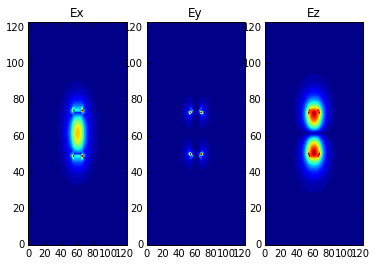

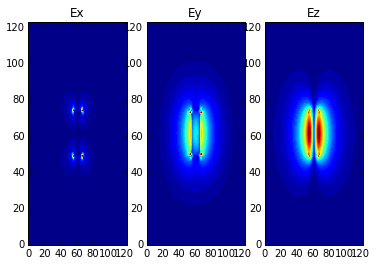

In [33]:
import numpy
import numpy
import EMpy
import pylab

def epsfunc(x_, y_):
    """Return a matrix describing a 2d material.

    :param x_: x values
    :param y_: y values
    :return: 2d-matrix
    """
    xx, yy = numpy.meshgrid(x_, y_)
    return numpy.where((numpy.abs(xx.T - 1.24e-6) <= .24e-6) *
                       (numpy.abs(yy.T - 1.11e-6) <= .11e-6),
                       3.4757**2,
                       1.446**2)

wl = 1.55e-6
x = numpy.linspace(0, 2.48e-6, 125)
y = numpy.linspace(0, 2.22e-6, 112)

neigs = 2
tol = 1e-8
boundary = '0000'

solver = EMpy.modesolvers.FD.VFDModeSolver(wl, x, y, epsfunc, boundary).solve(
    neigs, tol)

for i in range(neigs):
    fig = pylab.figure()
    fig.add_subplot(1, 3, 1)
    pylab.contourf(abs(solver.modes[i].Ex), 50)
    pylab.title('Ex')
    fig.add_subplot(1, 3, 2)
    pylab.contourf(abs(solver.modes[i].Ey), 50)
    pylab.title('Ey')
    fig.add_subplot(1, 3, 3)
    pylab.contourf(abs(solver.modes[i].Ez), 50)
    pylab.title('Ez')
    pylab.show()

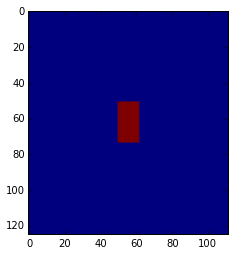

In [31]:
def epsfunc(x_, y_):
    """Return a matrix describing a 2d material.

    :param x_: x values
    :param y_: y values
    :return: 2d-matrix
    """
    xx, yy = numpy.meshgrid(x_, y_)
    return numpy.where((np.abs(xx.T - 1.24e-6) <= .24e-6) * (np.abs(yy.T - 1.11e-6) <= .11e-6),
                       3.4757**2, # do this if true (cladding)
                       1.446**2)

x = numpy.linspace(0, 2.48e-6, 125)
y = numpy.linspace(0, 2.22e-6, 112)
plt.imshow(epsfunc(x,y))  # extent=[x.min(),x.max(),y.min(),y.max()]
t = epsfunc(x,y)